<a href="https://www.kaggle.com/egbeolajohn/nosemask-detection-with-99-accuracy?scriptVersionId=89973849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers,callbacks
import os
import cv2
import glob

In [3]:
path = "../input/face-mask-12k-images-dataset/Face Mask Dataset/"
os.listdir(path)

['Validation', 'Test', 'Train']

In [4]:
image_path = []
label = []
location = []

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            image_path.append(image)
            label.append(status)
            location.append(where)
            
data = pd.DataFrame({'image_path':image_path,'label':label,'location':location})
data.head()

,image_path,label,location
0,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
1,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
2,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
3,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
4,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation


In [5]:
train_data =data[data['location']=='Train'].sample(frac=1)
test_data = data[data['location']=='Test'].sample(frac=1)
validation_data = data[data['location']=='Validation'].sample(frac=1)

In [6]:
def plot_images(data):
    for loc in range(3):
        plt.imshow(cv2.imread(data.iloc[loc,0]))
        plt.title(f'{data.iloc[loc,2]}-{data.iloc[loc,1]}')
        plt.show()

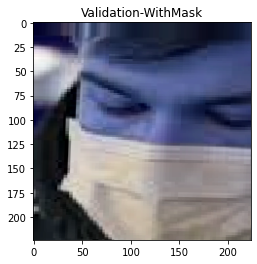

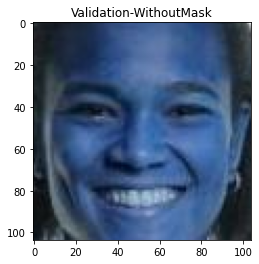

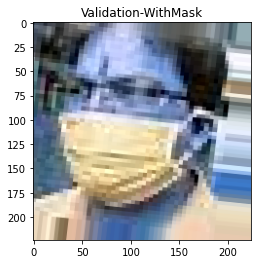

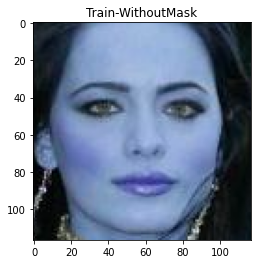

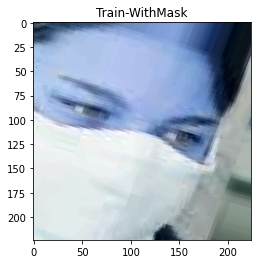

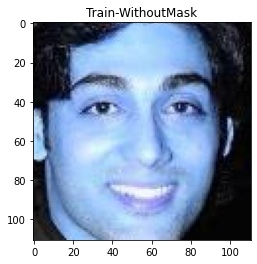

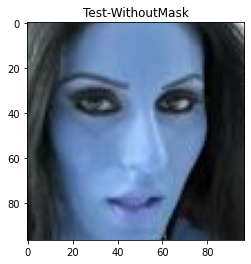

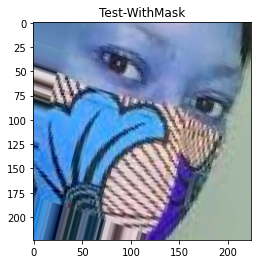

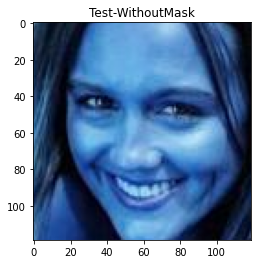

In [7]:
plot_images(validation_data)
plot_images(train_data)
plot_images(test_data)

In [8]:
 def data_preprocessing(input_data):
    input_data = input_data.reset_index().drop("index", axis = 1)
    data = []
    for i in range(len(input_data)):
        img_array = cv2.imread(input_data["image_path"][i], cv2.IMREAD_GRAYSCALE)
        new_image_array = cv2.resize(img_array, (150, 150))
        if input_data["label"][i] == "WithMask":
            data.append([new_image_array, 1])
        else:
            data.append([new_image_array, 0])
    data = np.array(data)
    X = []
    y = []
    for image in data:
        X.append(image[0])
        y.append(image[1])
    X = np.array(X)
    X = X/255
    X = X.reshape(len(X),X.shape[1],X.shape[2], 1)
    y = np.array(y)
    return [X,y]

In [9]:
Train_data = data_preprocessing(train_data)[0]
Train_labels = data_preprocessing(train_data)[1]
Validation_data = data_preprocessing(validation_data)[0]
Validation_labels = data_preprocessing(validation_data)[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
Train_data.shape,Train_labels.shape

((10000, 150, 150, 1), (10000,))

In [11]:
Train_labels[:4]

array([0, 1, 0, 0])

In [12]:
model = keras.Sequential([
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

2022-03-13 08:39:01.405490: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

In [14]:
#early_stopppings = callbacks.EarlyStopping(min_delta=0.001,patience=3,restore_best_weights=True)

In [15]:
model.fit(Train_data,Train_labels,validation_data=(Validation_data,Validation_labels),
                    batch_size = 45, epochs=5)#,callbacks=[early_stopppings],verbose=0)

2022-03-13 08:39:02.972745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
223/223 [==============================] - 574s 3s/step - loss: 1.8486 - binary_accuracy: 0.8466 - val_loss: 1.0327 - val_binary_accuracy: 0.9475
Epoch 2/5
223/223 [==============================] - 577s 3s/step - loss: 9.7060 - binary_accuracy: 0.9119 - val_loss: 4.2859 - val_binary_accuracy: 0.9212
Epoch 3/5
223/223 [==============================] - 585s 3s/step - loss: 1.7802 - binary_accuracy: 0.9579 - val_loss: 0.6395 - val_binary_accuracy: 0.9750
Epoch 4/5
223/223 [==============================] - 576s 3s/step - loss: 0.5867 - binary_accuracy: 0.9712 - val_loss: 0.3102 - val_binary_accuracy: 0.9762
Epoch 5/5
223/223 [==============================] - 577s 3s/step - loss: 0.3973 - binary_accuracy: 0.9790 - val_loss: 0.3165 - val_binary_accuracy: 0.9775


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 64)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 128)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       2

In [17]:
Test_data = data_preprocessing(test_data)[0]
Test_labels = data_preprocessing(test_data)[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [18]:
test_loss,test_acc = model.evaluate(Test_data,Test_labels)
print('Test Accuracy:', test_acc)

31/31 [==============================] - 14s 453ms/step - loss: 0.1952 - binary_accuracy: 0.9808
Test Accuracy: 0.9808467626571655


### 99% accuracy on new data